## Solution
The creation of the model will be carried out according to the following plan


1.   Features analysis
2.   Classification
3.   Quality Assessment 

## 1. Feature Analysis

For a better understanding of the problem, let's turn to the primary source - the article by Johnson et al. 

The study area for this article was a forested area in Ibaraki Prefecture, Japan, approximately 13 km × 12 km. The landscape consists mainly
of Cryptomeria japonica (Sugi, or Japanese Cedar) planted forest, Chamaecyparis obtusa (Hinoki, or Japanese Cypress) planted forest and mixed deciduous broadleaf natural forest, with a small amount of other land use/land cover types scattered throughout the image (agriculture, roads, buildings and so on).

Orthorectified ASTER imagery was acquired for three dates in different seasons (26 September 2010, 19 March 2011 and 8 May 2011) to provide adequate spectral **discrimination between coniferous and deciduous tree species**)

<img src="forest.png">
26 September 2010, 19 March 2011 and 8 May 2011 ASTER false colour
composite images of the study area located in Ibaraki Prefecture, Japan, with the study area indicated by the black lines

The dataset contains basic features b1-b9 that are the spectral values
(pixel brightness values) in the green, red, and near infrared wavelengths.

The columns are marked with symbols b1-b9. It is logical to assume that the first three values ​​are measurements in September, the second three values ​​are in March and the last three values ​​are in May; Columns b1, b4, b7 are green, b2, b5, b8 are red, b3, b6, b9 are near infrared.

Let's check it on the data. Conifers (sugi and hinoki) must be green at all seasons, so there must be a high correlation between b1, b4, b7. Broadleaf trees should be green in September and May, but leafless in March. Therefore, there must be a high correlation between b1 and b7. For other objects on the map, the correlation of green color should not vary greatly with the season.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
import numpy as np

In [2]:
df = pd.read_csv('training.csv')
base_col = ['b1','b2','b3','b4','b5','b6','b7','b8','b9']
green_col = ['b1','b4','b7']
red_col = ['b2','b5','b8']
nir_col = ['b3','b6','b9']

Encoding class

In [3]:
df['c'] = LabelEncoder().fit_transform(df['class'])

Average spectral values 

In [5]:
df['green']=(df['b1']+df['b4']+df['b7'])/3
df['red']=(df['b2']+df['b5']+df['b8'])/3
df['nir']=(df['b3']+df['b6']+df['b9'])/3
df

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9,c,green,red,nir
0,d,67,51,68,115,69,111,136,31,67,...,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11,0,106.000000,50.333333,82.000000
1,s,67,28,51,99,50,97,82,26,59,...,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57,3,82.666667,34.666667,69.000000
2,s,63,26,50,95,49,91,81,26,57,...,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85,3,79.666667,33.666667,66.000000
3,d,63,42,63,97,66,108,111,28,59,...,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52,0,90.333333,45.333333,76.666667
4,s,46,27,50,83,51,90,76,26,56,...,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32,3,68.333333,34.666667,65.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,o,55,56,72,91,79,113,86,35,68,...,-27.52,-1.04,-4.73,-22.85,-1.49,-4.10,2,77.333333,56.666667,84.333333
321,d,69,49,76,91,52,91,92,25,57,...,-16.90,-0.78,-4.15,-11.13,-1.48,-3.55,0,84.000000,42.000000,74.666667
322,s,49,26,48,107,59,104,62,22,53,...,-26.98,-1.36,-4.81,-24.50,-2.53,-4.97,3,72.666667,35.666667,68.333333
323,s,55,26,52,92,55,98,65,23,56,...,-25.53,-1.21,-4.70,-24.39,-2.21,-4.72,3,70.666667,34.666667,68.666667


Datasets for different classes

In [6]:
df_sugi = df[df['class'] == 's ']
df_hinoki = df[df['class'] == 'h ']
df_coniferous = df[(df['class'] == 's ') | (df['class'] == 'h ')]
df_deciduous = df[(df['class'] == 'd ')]
df_other = df[(df['class'] == 'o ')]

The difference beetwin conferious trees and other objects is better seen in red spectrum.

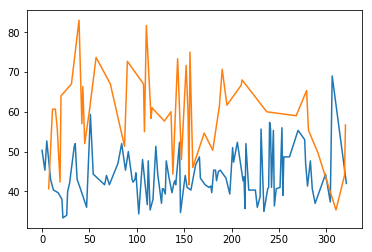

In [7]:
df_deciduous.red.plot()
df_other.red.plot()